## Sydney Rain Prediction model

In [138]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sn
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import pickle

## 1. Data Collection And Interpretation

In [2]:
#Importing Dataset
df=pd.read_excel("/home/student/Desktop/Prediction/Rainfall_Prediction/sydney_rain prediction.xlsx",header=0)

In [3]:
#Getting top 5 rows of data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
#shape of the dataset
df.shape

(3337, 17)

In [5]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [6]:
#info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

## 2.Data Preprocessing

In [7]:
#Creating Dummy Variables
df=pd.get_dummies(df,columns=['RainToday','RainTomorrow'],drop_first=True)

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


In [9]:
df['RainToday_Yes']=df['RainToday_Yes'].astype(int)
df['RainTomorrow_Yes']=df['RainTomorrow_Yes'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3334 non-null   float64       
 3   MaxTemp           3335 non-null   float64       
 4   Rainfall          3331 non-null   float64       
 5   Evaporation       3286 non-null   float64       
 6   Sunshine          3321 non-null   float64       
 7   Humidity9am       3323 non-null   float64       
 8   Humidity3pm       3324 non-null   float64       
 9   Pressure9am       3317 non-null   float64       
 10  Pressure3pm       3318 non-null   float64       
 11  Cloud9am          2771 non-null   float64       
 12  Cloud3pm          2776 non-null   float64       
 13  Temp9am           3333 non-null   float64       
 14  Temp3pm           3333 n

## Observation
By observing the above information, it is clear that there  are so many missing or null values in almost all columns

In [11]:
df.isnull().sum()

Date                  0
Location              0
MinTemp               3
MaxTemp               2
Rainfall              6
Evaporation          51
Sunshine             16
Humidity9am          14
Humidity3pm          13
Pressure9am          20
Pressure3pm          19
Cloud9am            566
Cloud3pm            561
Temp9am               4
Temp3pm               4
RainToday_Yes         0
RainTomorrow_Yes      0
dtype: int64

In [12]:
#Treating Missing Values

In [13]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3337 non-null   float64       
 3   MaxTemp           3337 non-null   float64       
 4   Rainfall          3337 non-null   float64       
 5   Evaporation       3337 non-null   float64       
 6   Sunshine          3337 non-null   float64       
 7   Humidity9am       3337 non-null   float64       
 8   Humidity3pm       3337 non-null   float64       
 9   Pressure9am       3337 non-null   float64       
 10  Pressure3pm       3337 non-null   float64       
 11  Cloud9am          3337 non-null   float64       
 12  Cloud3pm          3337 non-null   float64       
 13  Temp9am           3337 non-null   float64       
 14  Temp3pm           3337 n

In [15]:
#Getting Sum of null values
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

<Axes: xlabel='Location', ylabel='count'>

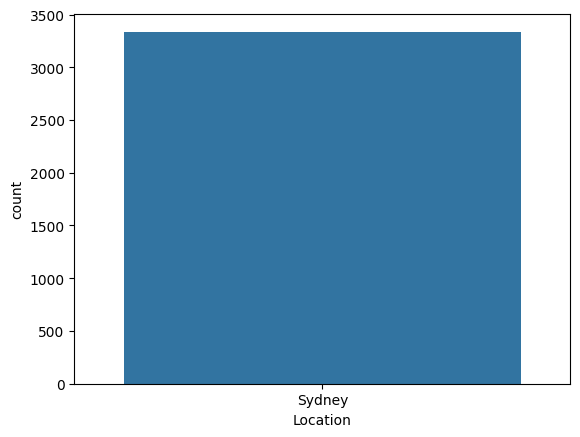

In [16]:
sns.countplot(x='Location',data=df)

## Observation
Single value in Location column, so we can delete the Location column variable

In [17]:
#Deleting location variable
del df['Location']

In [18]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [19]:
#deleting Date column
del df['Date']

In [20]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


## Data Visualiztion

<Axes: xlabel='RainTomorrow_Yes', ylabel='count'>

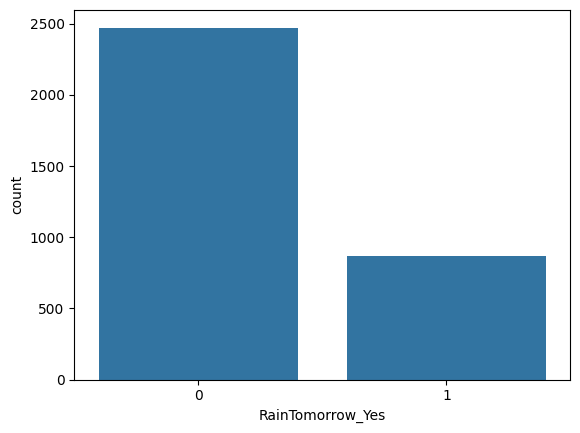

In [21]:
sns.countplot(x='RainTomorrow_Yes',data=df)

<Axes: xlabel='RainToday_Yes', ylabel='count'>

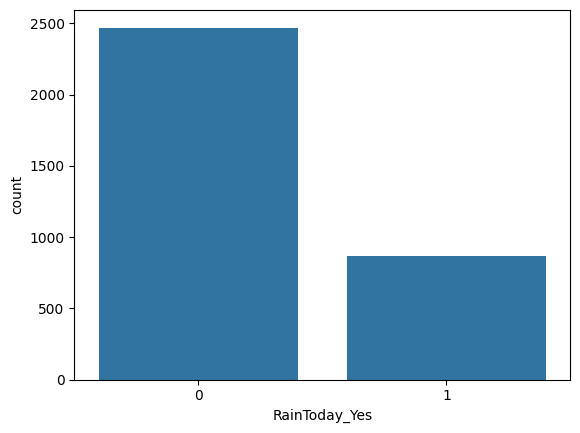

In [22]:
sns.countplot(x='RainToday_Yes',data=df)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   int64  
 14  RainTomorrow_Yes  3337 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 391.2 KB


In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


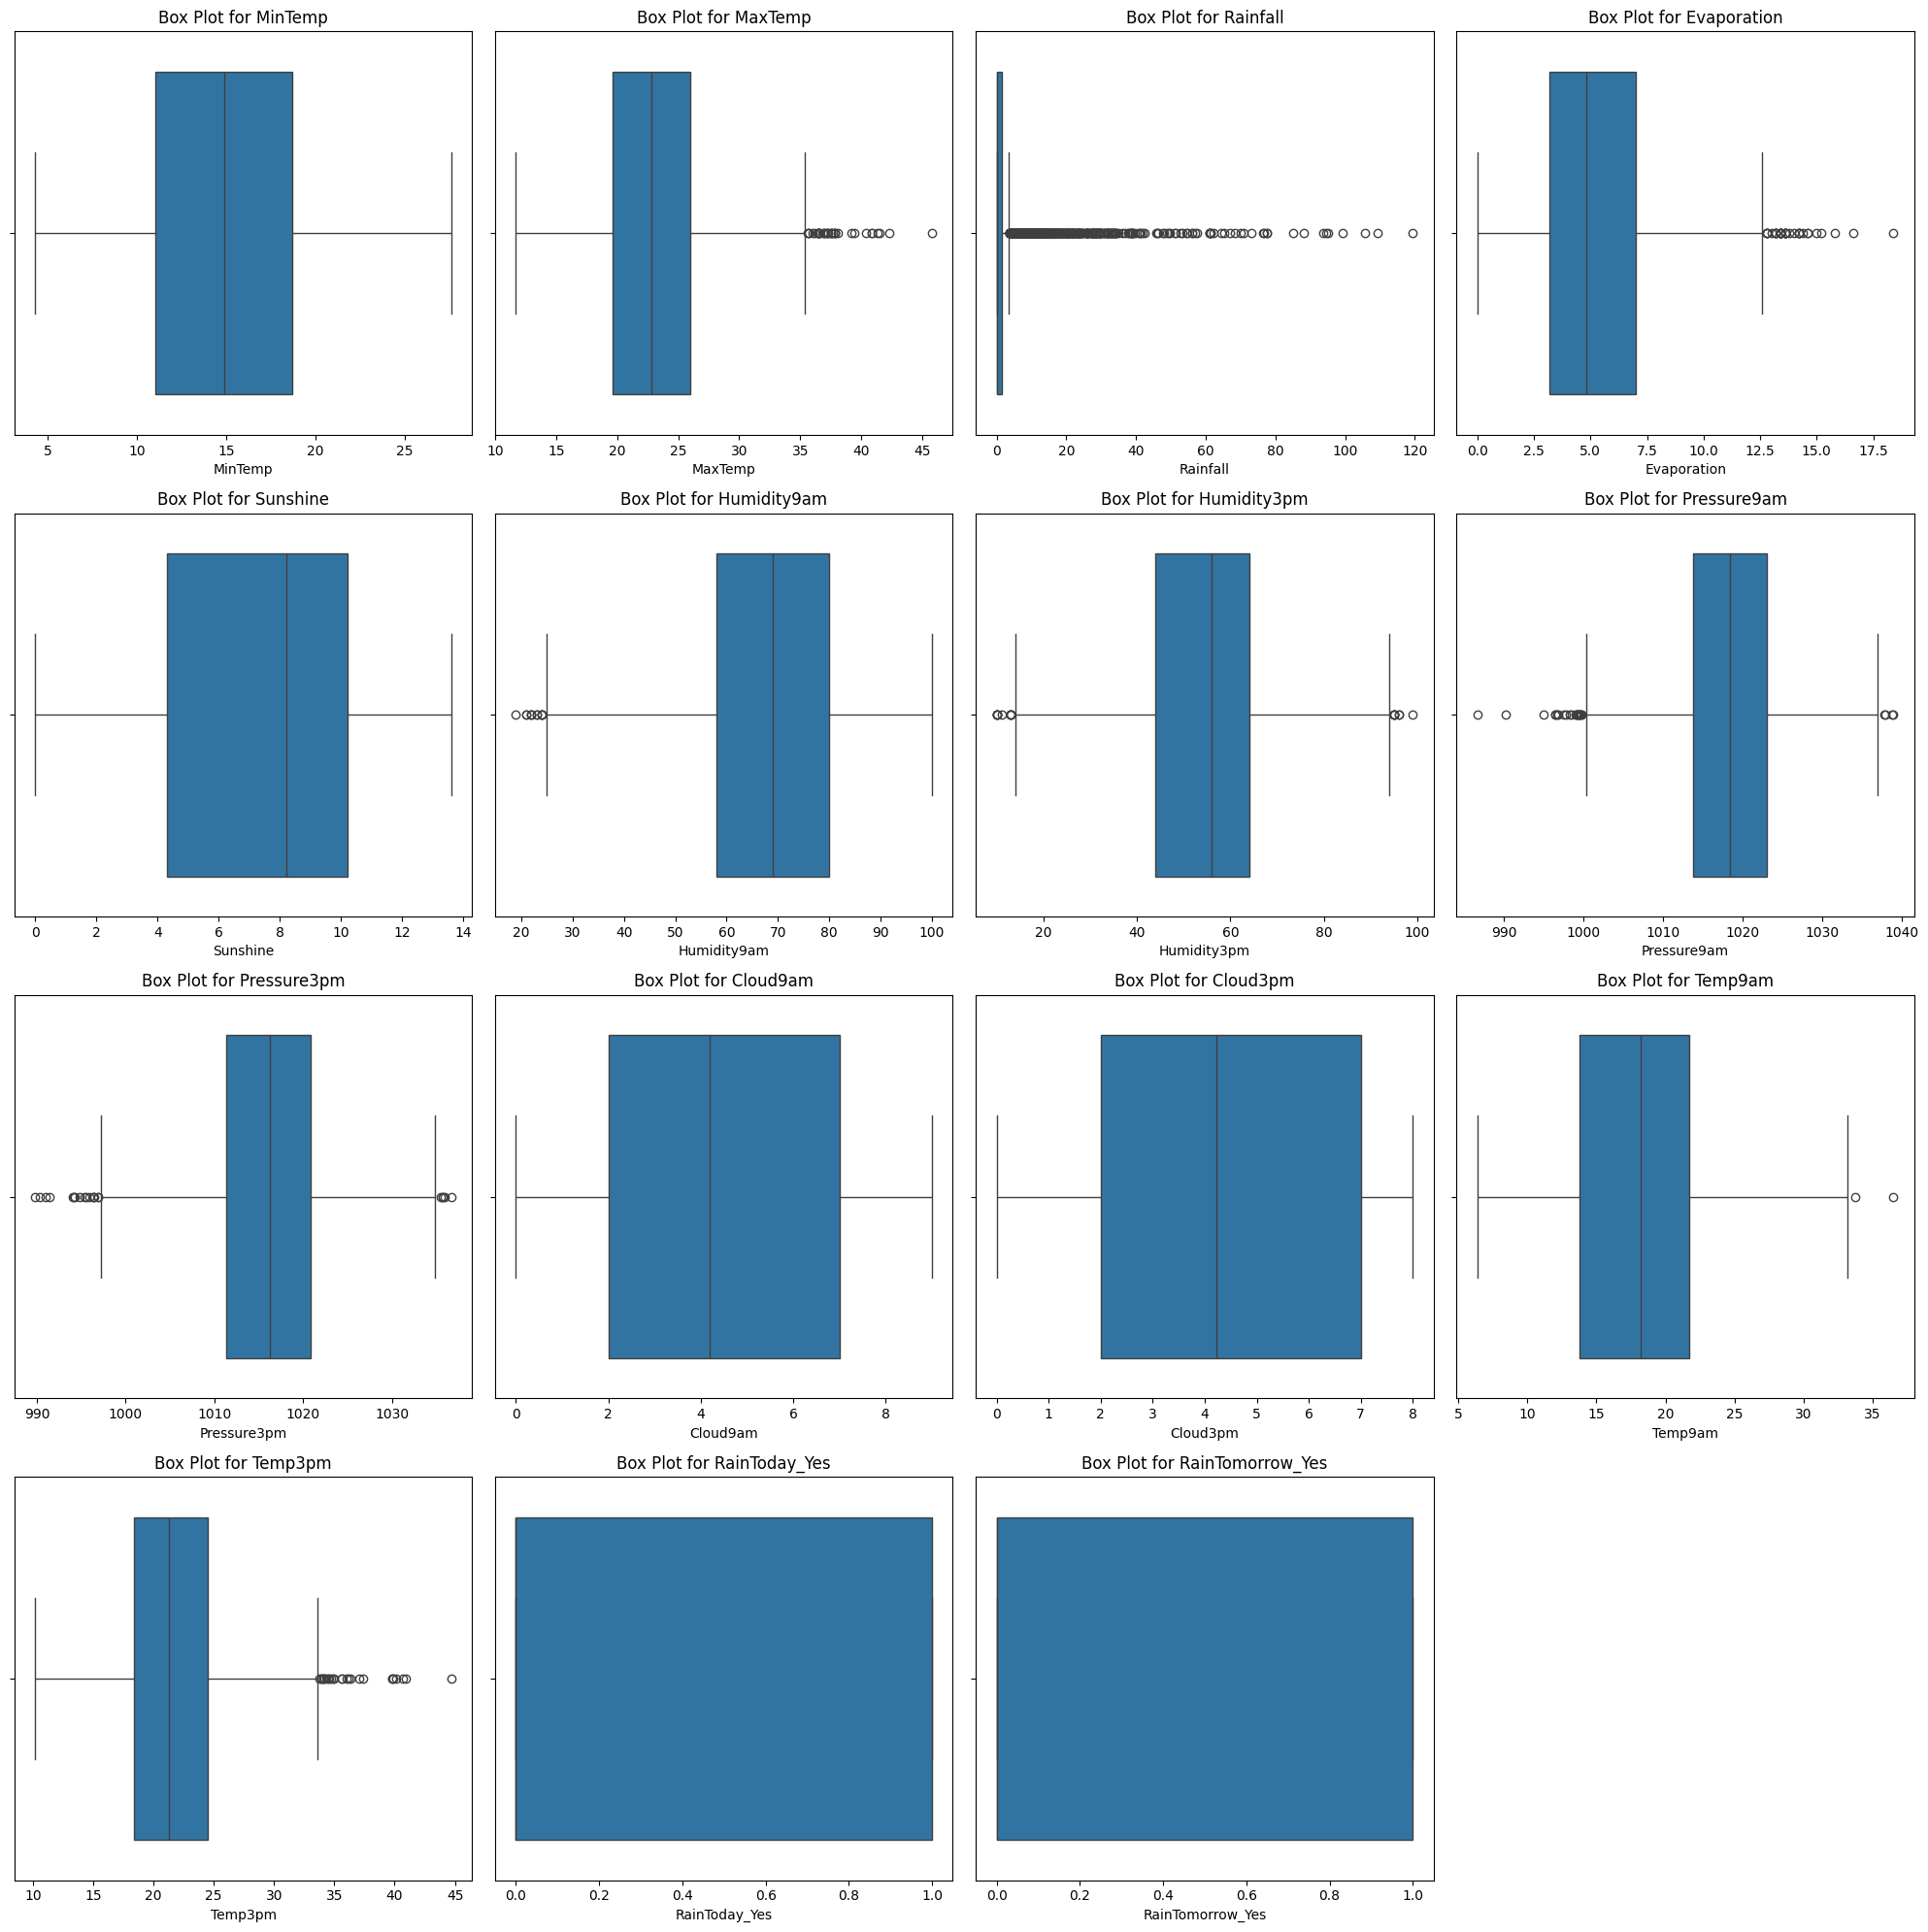

In [25]:
# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

In [26]:
#Treating outliers for Max_Temp column
np.percentile(df.MaxTemp,[99])

array([35.528])

In [27]:
uv=np.percentile(df.MaxTemp,[99])[0]

In [28]:
df[(df.MaxTemp)>uv]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
358,24.8,40.9,0.000000,10.6,11.100000,55.00000,20.0,1004.8,1002.8,6.000000,2.00000,31.5,40.1,0,0
641,18.9,36.9,0.000000,6.2,11.000000,73.00000,18.0,1011.9,1006.6,6.000000,6.00000,24.0,36.3,0,0
660,21.2,40.4,0.000000,7.4,6.000000,75.00000,19.0,1005.0,1001.5,6.000000,7.00000,24.0,39.8,0,0
722,25.0,41.3,0.000000,13.4,5.600000,28.00000,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,0,1
742,23.9,37.8,0.000000,9.0,9.800000,71.00000,32.0,1008.7,1005.5,6.000000,7.00000,26.9,37.4,0,1
1095,25.1,37.5,0.000000,10.2,5.700000,58.00000,54.0,1011.0,1009.9,4.181523,4.21866,30.6,33.6,0,0
1097,24.2,41.5,0.000000,8.4,12.400000,46.00000,22.0,1010.0,1006.6,4.181523,4.21866,33.7,40.9,0,0
1098,27.6,35.6,0.000000,16.6,2.600000,56.00000,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1349,19.8,37.2,0.000000,4.4,9.700000,68.22901,23.0,1009.5,1004.9,4.181523,4.21866,26.2,34.9,0,0
1739,20.9,42.3,0.000000,9.8,8.700000,52.00000,14.0,1005.8,999.1,6.000000,6.00000,27.3,39.8,0,0


In [29]:
df.MaxTemp[(df.MaxTemp>uv)]=uv

/tmp/ipykernel_6073/3800104171.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.MaxTemp[(df.MaxTemp>uv)]=uv
/tmp/ipykernel_6073/3800104171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

<Axes: xlabel='MaxTemp'>

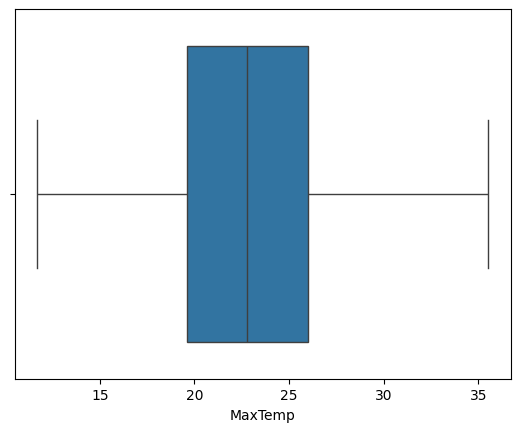

In [30]:
sns.boxplot(x='MaxTemp',data=df)

In [31]:
#Outliers are treated here for Rainfall 
np.percentile(df.Rainfall,[99])

array([52.296])

In [32]:
# Treating outliers for rainfall variable
uv=np.percentile(df.Rainfall,[99])[0]

In [33]:
df[(df.Rainfall)>uv]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
4,19.7,25.7,77.4,5.187432,0.000000,88.0,74.0,1008.3,1004.8,8.000000,8.00000,22.5,25.5,1,1
218,11.8,14.2,62.2,5.187432,0.000000,92.0,88.0,1014.8,1013.1,8.000000,8.00000,13.0,12.3,1,1
633,14.4,17.0,73.2,5.187432,0.000000,91.0,60.0,1023.7,1025.3,8.000000,8.00000,14.7,16.6,1,1
737,20.2,25.0,77.4,7.400000,0.200000,95.0,86.0,1021.6,1020.8,7.000000,8.00000,21.1,23.8,1,1
743,21.4,25.5,70.0,9.400000,0.300000,92.0,80.0,1011.9,1010.2,8.000000,8.00000,22.1,25.2,1,1
855,12.5,20.5,61.4,1.000000,4.400000,80.0,67.0,1014.2,1012.0,5.000000,7.00000,13.5,17.4,1,0
1140,18.8,23.5,99.4,5.187432,3.300000,92.0,81.0,1012.4,1010.1,4.181523,4.21866,19.4,22.2,1,1
1182,13.9,19.9,65.2,5.187432,0.700000,81.0,62.0,1019.5,1019.3,4.181523,4.21866,17.9,19.6,1,1
1232,8.7,18.5,76.8,5.187432,1.600000,91.0,83.0,1012.7,1013.5,4.181523,4.21866,14.3,15.0,1,1
1234,11.3,13.9,88.2,5.187432,0.000000,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1


In [34]:
df.Rainfall[(df.Rainfall>1.2*uv)]=1.2*uv

/tmp/ipykernel_6073/3632289836.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Rainfall[(df.Rainfall>1.2*uv)]=1.2*uv
/tmp/ipykernel_6073/3632289836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

<Axes: xlabel='Rainfall'>

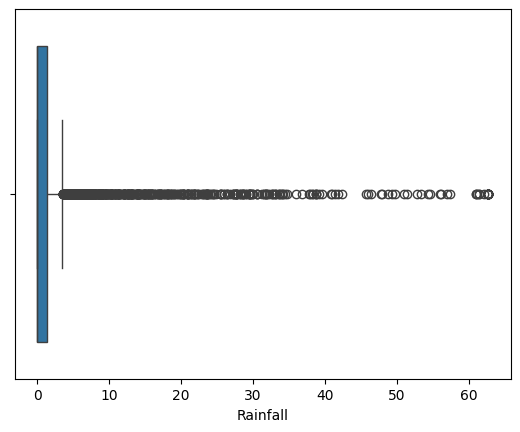

In [35]:
sns.boxplot(x='Rainfall',data=df)

In [36]:
np.percentile(df.Evaporation,[99])

array([12.8])

In [37]:
uv=np.percentile(df.Evaporation,[99])[0]
df[(df.Evaporation)>1.1*uv]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
349,23.0,33.400,0.0,14.2,9.4,61.0,39.0,1009.1,1006.0,4.181523,6.00000,28.6,33.1,0,1
357,25.0,31.700,0.0,14.2,11.9,59.0,58.0,1009.2,1007.6,1.000000,2.00000,29.5,29.1,0,0
373,21.4,28.600,0.0,14.2,12.2,69.0,53.0,1010.8,1007.5,0.000000,1.00000,24.2,28.1,0,0
1098,27.6,35.528,0.0,16.6,2.6,56.0,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1740,21.1,25.000,0.0,18.4,6.1,64.0,44.0,999.3,1002.1,6.000000,6.00000,22.5,21.7,0,0
1990,13.1,20.700,5.0,15.2,6.7,44.0,34.0,1014.5,1014.4,5.000000,2.00000,14.8,19.3,1,0
2372,13.7,23.500,2.4,15.0,12.9,26.0,23.0,1017.9,1017.9,1.000000,1.00000,16.8,21.8,1,0
2754,20.3,22.100,0.0,14.6,0.3,65.0,56.0,1015.6,1017.3,7.000000,7.00000,20.8,20.7,0,0
2760,16.5,22.600,0.6,14.6,7.1,54.0,60.0,1016.1,1013.8,7.000000,4.00000,21.1,21.6,0,0
2765,19.2,22.800,0.0,14.2,5.3,66.0,59.0,1015.1,1017.0,7.000000,7.00000,21.0,19.4,0,0


In [38]:
df.Evaporation[(df.Evaporation>1.1*uv)]=1.1*uv

/tmp/ipykernel_6073/3014588392.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Evaporation[(df.Evaporation>1.1*uv)]=1.1*uv
/tmp/ipykernel_6073/3014588392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

<Axes: xlabel='Evaporation'>

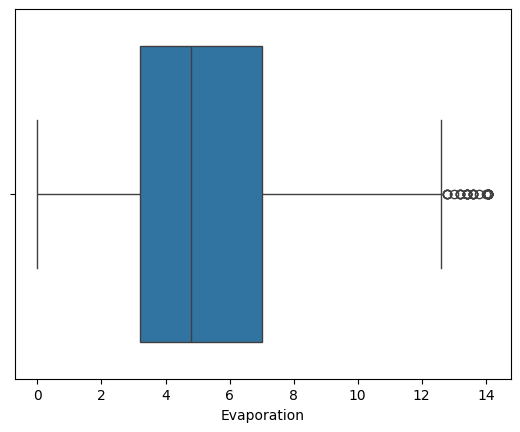

In [39]:
sns.boxplot(x='Evaporation',data=df)

In [40]:
## Treating Outliers of Humidity9am variable
np.percentile(df.Humidity9am,[1])[0]
lv=np.percentile(df.Humidity9am,[1])[0]
lv

np.float64(30.0)

In [41]:
df[(df.Humidity9am)<0.8*lv]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
608,14.9,33.100,0.0,7.0,10.8,21.0,10.0,1013.4,1007.7,3.0,1.0,25.6,32.8,0,0
1647,16.4,21.700,0.0,10.8,8.7,22.0,22.0,1005.8,1006.2,0.0,5.0,21.3,18.4,0,0
1675,20.0,34.200,0.0,10.8,10.3,22.0,59.0,1014.0,1013.0,0.0,5.0,27.9,22.8,0,0
1986,17.6,35.528,0.0,10.0,10.0,22.0,10.0,1009.7,1003.1,7.0,1.0,27.3,37.1,0,0
1993,19.6,33.600,0.0,11.2,5.2,23.0,10.0,1005.9,1003.3,7.0,7.0,27.5,31.5,0,0
2341,15.6,22.100,0.0,12.0,11.3,19.0,28.0,1017.7,1018.5,1.0,1.0,18.2,19.6,0,0
3104,21.0,25.700,0.0,13.4,12.4,21.0,16.0,1002.9,1006.2,1.0,1.0,25.7,24.9,0,0
3143,27.1,35.528,0.0,13.4,2.5,23.0,16.0,1008.5,1007.0,7.0,7.0,32.4,34.1,0,1


In [42]:
df.Humidity9am[(df.Humidity9am < 0.8*lv)]=0.8*lv

/tmp/ipykernel_6073/2350340143.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Humidity9am[(df.Humidity9am < 0.8*lv)]=0.8*lv
/tmp/ipykernel_6073/2350340143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

<Axes: xlabel='Humidity9am'>

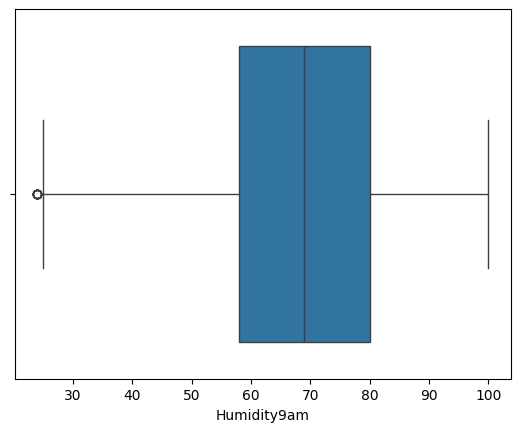

In [43]:
sns.boxplot(x='Humidity9am',data=df)

In [44]:
lv=np.percentile(df.Humidity3pm,[1])[0]
uv=np.percentile(df.Humidity3pm,[99])[0]

In [45]:
print(lv,uv)

18.0 92.0


In [46]:
df[(df.Humidity3pm)<0.8*lv]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
608,14.9,33.100,0.0,7.0,10.8,24.0,10.0,1013.4,1007.7,3.000000,1.00000,25.6,32.8,0,0
717,16.7,25.700,0.0,8.0,13.0,55.0,14.0,1002.9,1002.5,1.000000,2.00000,21.0,25.1,0,0
1288,11.1,26.700,0.0,5.2,10.9,37.0,14.0,1022.3,1017.0,4.181523,4.21866,19.0,26.0,0,0
1297,12.7,32.500,0.0,5.6,9.5,44.0,14.0,1015.9,1012.8,4.181523,4.21866,22.8,30.4,0,0
1645,11.1,28.300,0.0,5.2,10.6,28.0,13.0,1016.0,1007.3,1.000000,0.00000,20.8,27.5,0,0
1646,18.4,27.900,0.0,13.4,10.7,28.0,10.0,1007.7,1005.3,0.000000,0.00000,21.5,27.6,0,0
1739,20.9,35.528,0.0,9.8,8.7,52.0,14.0,1005.8,999.1,6.000000,6.00000,27.3,39.8,0,0
1749,21.7,35.528,0.0,9.0,8.4,62.0,14.0,1002.9,997.9,0.000000,3.00000,28.9,44.7,0,0
1956,20.1,31.600,0.0,7.4,9.7,24.0,14.0,1005.5,1000.4,2.000000,4.00000,25.9,30.6,0,0
1974,11.7,29.300,0.0,8.0,11.5,47.0,13.0,1011.1,1005.2,1.000000,1.00000,18.9,27.9,0,0


In [47]:
df.Humidity3pm[(df.Humidity3pm<0.8* lv)]=0.8*lv

/tmp/ipykernel_6073/4068762005.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Humidity3pm[(df.Humidity3pm<0.8* lv)]=0.8*lv
/tmp/ipykernel_6073/4068762005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [48]:
df[(df.Humidity3pm)>uv]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
361,20.2,23.9,14.2000,1.800000,1.7,95.0,93.0,1021.1,1019.9,8.000000,8.00000,20.8,22.4,1,1
632,17.9,20.9,0.0000,5.600000,1.1,72.0,94.0,1016.0,1015.7,7.000000,8.00000,20.3,16.5,0,1
736,20.5,22.4,31.2000,5.000000,0.0,95.0,95.0,1015.7,1016.2,7.000000,8.00000,21.6,22.2,1,1
842,9.5,14.7,14.2000,5.000000,0.4,91.0,93.0,1023.6,1020.8,7.000000,6.00000,10.4,14.3,1,1
845,13.4,17.3,9.0000,2.200000,0.0,96.0,94.0,1004.8,1004.9,8.000000,8.00000,13.5,15.6,1,1
854,15.2,17.7,26.4000,3.400000,0.0,85.0,94.0,1018.7,1015.5,7.000000,8.00000,17.3,16.4,1,1
1015,22.3,23.9,0.0000,10.400000,0.0,70.0,95.0,1012.8,1012.6,4.181523,4.21866,23.9,19.4,0,1
1234,11.3,13.9,62.7552,5.187432,0.0,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1
1334,18.1,25.8,0.0000,5.600000,8.1,75.0,99.0,1012.1,1009.5,4.181523,4.21866,21.6,21.6,0,0
1352,15.9,21.4,12.8000,2.400000,0.0,93.0,94.0,1020.5,1018.7,4.181523,4.21866,17.2,17.9,1,1


<Axes: xlabel='Humidity3pm'>

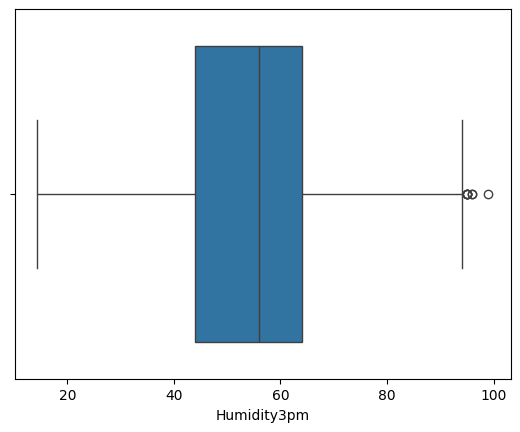

In [49]:
sns.boxplot(x='Humidity3pm',data=df)

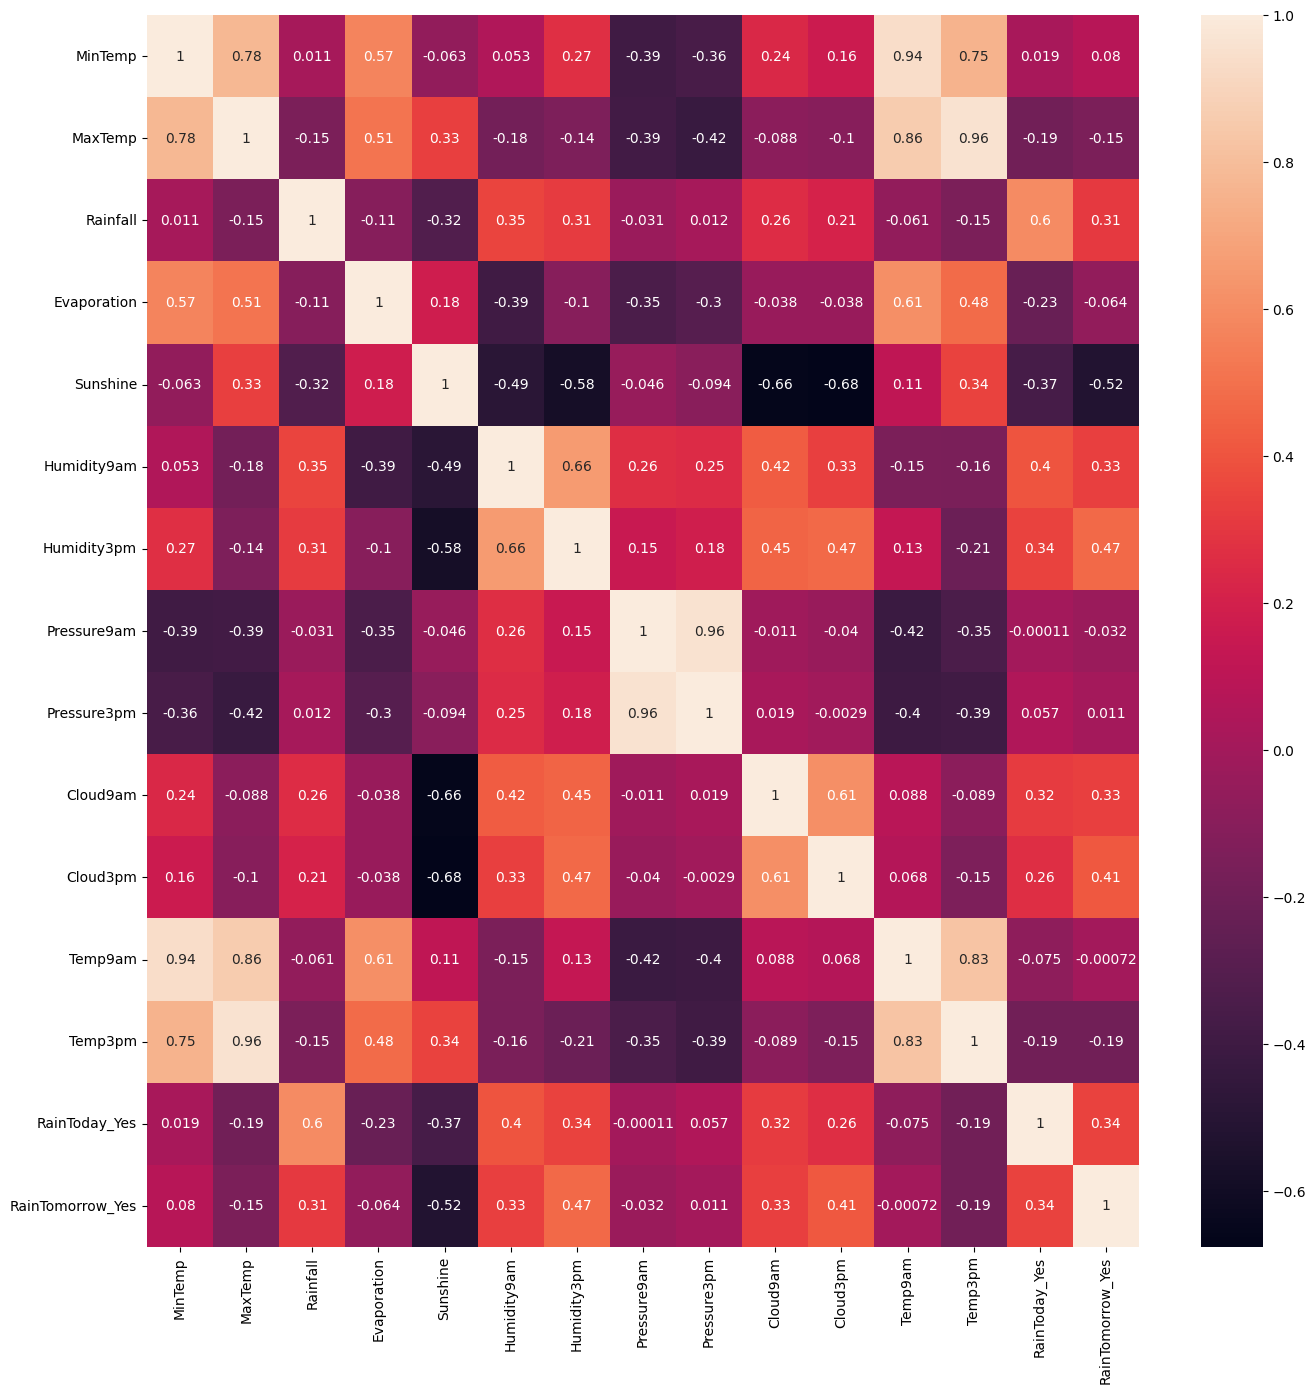

In [50]:
corr_mat = df.corr()
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(corr_mat,annot=True)

## Interpretation
I did not compress outliers very much because they may lose actual values ,I compress them to some extent only. and i did not treat outliers in highly correlated variables

### Observation
Max_temp and Temp3pm are correlated very much so iam going to delete Temp3pm column
And Min_Temp and Temp9am are correlated very much so iam going to delete Temp9am colum
And Pressure3pm and Pressure9am also correlated very much so iam going to delete pressure9am

In [51]:
del df['Temp9am']

In [52]:
del df['Temp3pm']

In [53]:
del df['Pressure9am']

In [54]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6000,6.200000,0.0,92.0,84.0,1017.4,8.0,8.0,1,1
1,19.5,25.6,6.0000,3.400000,2.7,83.0,73.0,1016.4,7.0,7.0,1,1
2,21.6,24.5,6.6000,2.400000,0.1,88.0,86.0,1015.6,7.0,8.0,1,1
3,20.2,22.8,18.8000,2.200000,0.0,83.0,90.0,1011.8,8.0,8.0,1,1
4,19.7,25.7,62.7552,5.187432,0.0,88.0,74.0,1004.8,8.0,8.0,1,1


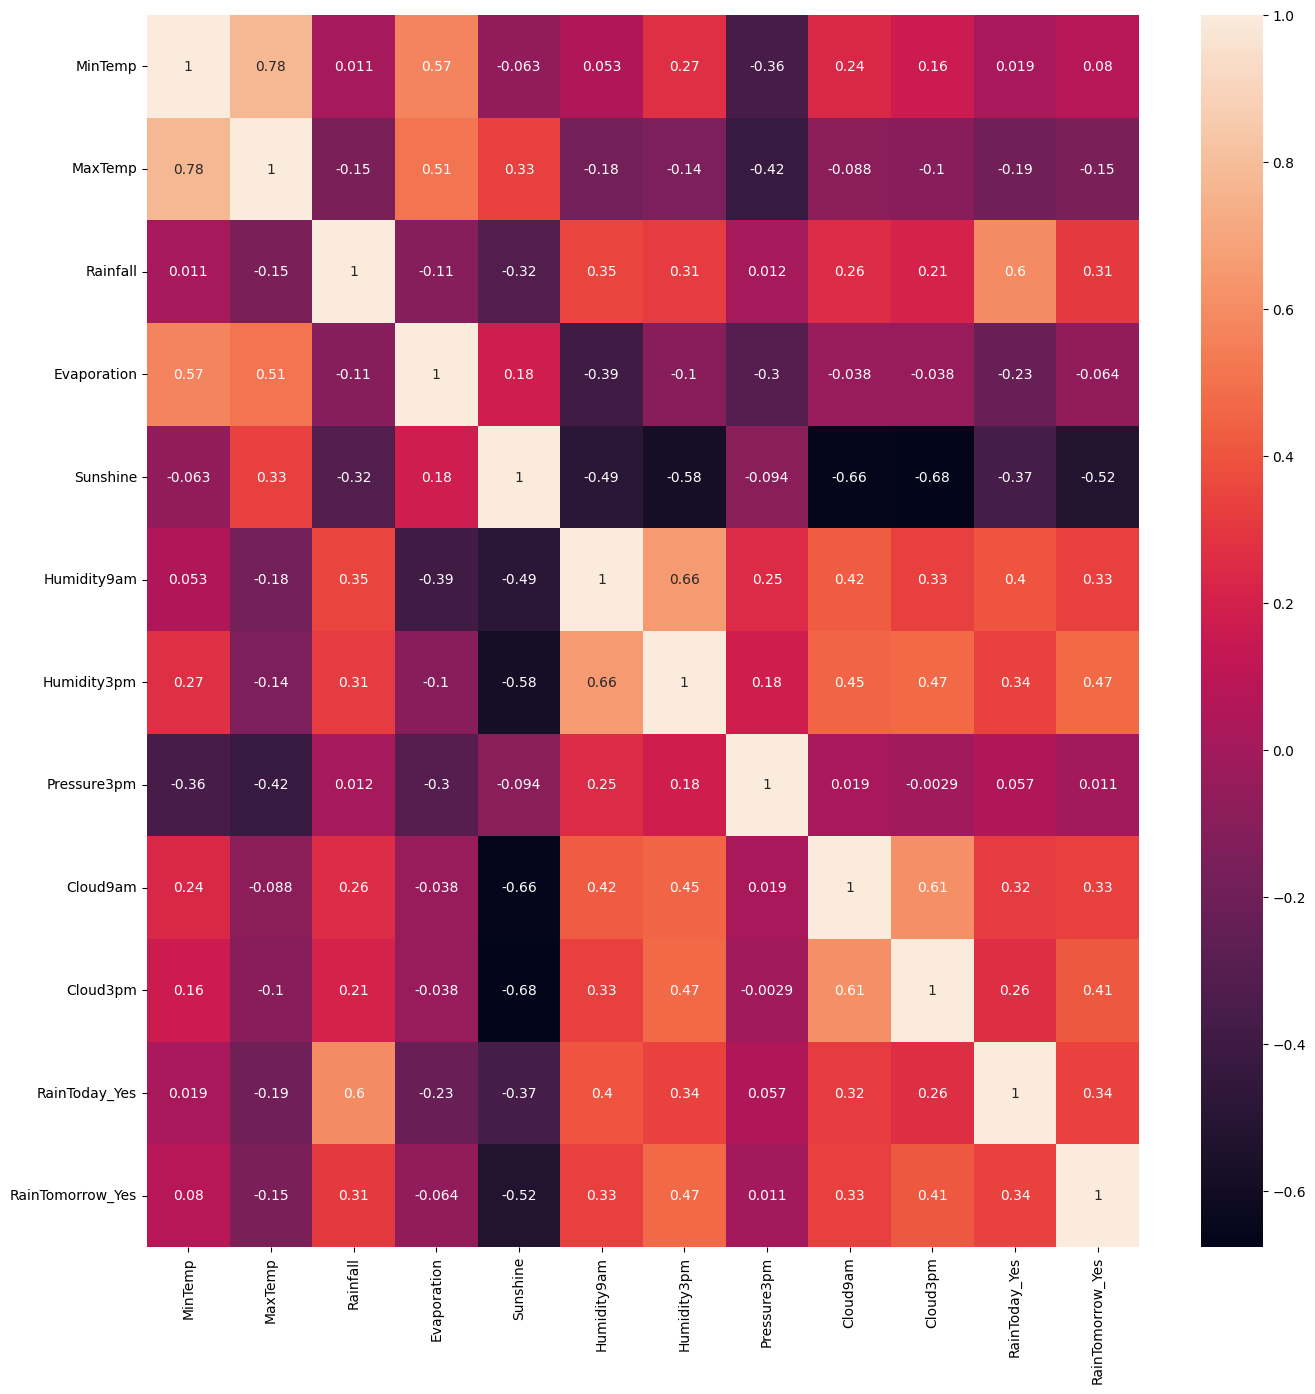

In [55]:
corr_mat = df.corr()
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(corr_mat,annot=True)

## Interpretation
I deleted one of the pair of highly correlated independent variables to avoid multicollinearity

In [56]:
df.shape

(3337, 12)

## 3.Models Interpretation

## Logistic Regression with multiple predictors

In [57]:
x_multi=df.loc[:,df.columns!='RainTomorrow_Yes']
y_multi = df['RainTomorrow_Yes']

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
clf_lrs=LogisticRegression()
clf_lrs.fit(x_multi,y_multi)

/home/student/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
clf_lrs.coef_

array([[-0.07634616,  0.07143777,  0.03677025,  0.0426857 , -0.22265607,
         0.00284137,  0.05268498, -0.00412687, -0.10709354,  0.18470316,
         0.0591961 ]])

In [61]:
clf_lrs.intercept_

array([0.00065858])

## Using Stats model

In [62]:
import statsmodels.api as sn

In [63]:
x_cons=sn.add_constant(x_multi)

In [64]:
import statsmodels.discrete.discrete_model as sm

In [65]:
logit=sm.Logit(y_multi,x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.385193
         Iterations 7


In [66]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3325
Method:                           MLE   Df Model:                           11
Date:                Thu, 18 Jul 2024   Pseudo R-squ.:                  0.3269
Time:                        11:18:06   Log-Likelihood:                -1285.4
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                6.246e-261
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.5445      8.206      2.869      0.004       7.460      39.629
MinTemp          -0.1046      0.028     -3.770      0.000      -0.159      -0.050
MaxTemp           0.0708      0.028      2.572      0.010       0.017       0.125
Rainfall          0.0151      0.007      2.143      0.032       0.001       0.029
Evaporation       0.0737      0.025      2.905      0.004       0.024       0.123
Sunshine         -0.2217      0.022     -9.864      0.000      -0.266      -0.178
Humidity9am      -0.0003      0.005     -0.056      0.955      -0.011       0.010
Humidity3pm       0.0551      0.005     10.293      0.000       0.045       0.066
Pressure3pm      -0.0270      0.008     -3.380      0.001      -0.043      -0.011
Cloud9am         -0.0954      0.030     -3.191      0.001      -0.154      -0.037
Cloud3pm          0.1636      0.031      5.254      0.000       0.103       0.225
RainToday_Yes     0.8011      0.137      5.866      0.000       0.533       1.069
=================================================================================
"""

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score

In [68]:
y_pred=clf_lrs.predict(x_multi)

In [69]:
confusion_matrix(y_multi,y_pred)

array([[2294,  178],
       [ 385,  480]])

In [70]:
precision_score(y_multi,y_pred)

np.float64(0.729483282674772)

In [71]:
accuracy_score(y_multi,y_pred)

0.8312855858555589

In [72]:
roc_auc_score(y_multi,y_pred)

np.float64(0.7414534111528892)

In [73]:
recall_score(y_multi,y_pred)

np.float64(0.5549132947976878)

### Splitting data into Train and Test Data

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

## Linear Discriminant Analysis

In [75]:
#importing LinearDiscriminantAnalysis library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [76]:
# Create an LDA model with specific parameters
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

In [77]:
# Fit the model on the training data
lda_model.fit(x_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [78]:
# Predict values using the model
y_train_pred_lda = lda_model.predict(x_train)
y_test_pred_lda = lda_model.predict(x_test)

In [79]:
# Model Performance
cfm_train_lda = confusion_matrix(y_train, y_train_pred_lda)
cfm_test_lda = confusion_matrix(y_test, y_test_pred_lda)
acs_train_lda = accuracy_score(y_train, y_train_pred_lda)
acs_test_lda = accuracy_score(y_test, y_test_pred_lda)
pcs_train_lda = precision_score(y_train, y_train_pred_lda)
pcs_test_lda = precision_score(y_test, y_test_pred_lda)
rcs_train_lda = recall_score(y_train, y_train_pred_lda)
rcs_test_lda = recall_score(y_test, y_test_pred_lda)
roc_auc_score_train_lda = roc_auc_score(y_train, y_train_pred_lda)
roc_auc_score_test_lda = roc_auc_score(y_test, y_test_pred_lda)

In [80]:
# Print the results for LDA Model
print("Linear Discriminant Analysis (LDA) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lda)
print("\nAccuracy Score (Training Data):", acs_train_lda)
print("\nPrecision Score (Training Data):", pcs_train_lda)
print("\nRecall Score (Training Data):", rcs_train_lda)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lda)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lda)
print("\nAccuracy Score (Testing Data):", acs_test_lda)
print("\nPrecision Score (Testing Data):", pcs_test_lda)
print("\nRecall Score (Testing Data):", rcs_test_lda)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lda)
print("\n------------------------------------------------------")

Linear Discriminant Analysis (LDA) Results:
Confusion Matrix (Training Data):
[[1833  155]
 [ 284  397]]

Accuracy Score (Training Data): 0.8355189209441738

Precision Score (Training Data): 0.7192028985507246

Recall Score (Training Data): 0.5829662261380323

ROC AUC Score (Training Data): 0.7524992096484929

------------------------------------------------------

Confusion Matrix (Testing Data):
[[439  45]
 [ 78 106]]

Accuracy Score (Testing Data): 0.8158682634730539

Precision Score (Testing Data): 0.7019867549668874

Recall Score (Testing Data): 0.5760869565217391

ROC AUC Score (Testing Data): 0.7415558749550846

------------------------------------------------------


## Observations
Since it is having 70% accuracy score for test data,It is a good model .And still it is not overfitted or underfitted

## K Nearest Neighbour Classifier With GridSearchCV

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

In [83]:
# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7]
}

In [84]:
# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [85]:
# Get the best parameters and model
best_params_knn = grid_search_knn.best_params_
best_knn_classifier = grid_search_knn.best_estimator_

In [86]:
# Predict values using the best model
y_train_pred_knn = best_knn_classifier.predict(x_train)
y_test_pred_knn = best_knn_classifier.predict(x_test)

In [87]:
# Model Performance
cfm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cfm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
acs_train_knn = accuracy_score(y_train, y_train_pred_knn)
acs_test_knn = accuracy_score(y_test, y_test_pred_knn)
pcs_train_knn = precision_score(y_train, y_train_pred_knn)
pcs_test_knn = precision_score(y_test, y_test_pred_knn)
rcs_train_knn = recall_score(y_train, y_train_pred_knn)
rcs_test_knn = recall_score(y_test, y_test_pred_knn)
roc_auc_score_train_knn = roc_auc_score(y_train, y_train_pred_knn)
roc_auc_score_test_knn = roc_auc_score(y_test, y_test_pred_knn)

In [88]:
# Print the results for K-Nearest Neighbors (KNN) Model
print("K-Nearest Neighbors (KNN) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_knn)
print("\nAccuracy Score (Training Data):", acs_train_knn)
print("\nPrecision Score (Training Data):", pcs_train_knn)
print("\nRecall Score (Training Data):", rcs_train_knn)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_knn)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_knn)
print("\nAccuracy Score (Testing Data):", acs_test_knn)
print("\nPrecision Score (Testing Data):", pcs_test_knn)
print("\nRecall Score (Testing Data):", rcs_test_knn)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_knn)
print("\n------------------------------------------------------")

K-Nearest Neighbors (KNN) Results:
Confusion Matrix (Training Data):
[[1894   94]
 [ 294  387]]

Accuracy Score (Training Data): 0.854627201198951

Precision Score (Training Data): 0.8045738045738046

Recall Score (Training Data): 0.5682819383259912

ROC AUC Score (Training Data): 0.7604991180563556

------------------------------------------------------

Confusion Matrix (Testing Data):
[[436  48]
 [ 89  95]]

Accuracy Score (Testing Data): 0.7949101796407185

Precision Score (Testing Data): 0.6643356643356644

Recall Score (Testing Data): 0.5163043478260869

ROC AUC Score (Testing Data): 0.7085653970535394

------------------------------------------------------


### Standardization

## Scale the train and test data using StandardScaler from Sklearn.preprocessing

In [89]:
from sklearn import preprocessing

In [90]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [91]:
x_train_s=scaler.transform(x_train)

In [92]:
scaler=preprocessing.StandardScaler().fit(x_test)

In [93]:
x_test_s=scaler.transform(x_test)

In [94]:
params={'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [95]:
grid_search_cv=GridSearchCV(KNeighborsClassifier(), params)

In [96]:
grid_search_cv.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [97]:
# Get the best parameters and model
best_params_knn = grid_search_cv.best_params_
best_knn_classifier = grid_search_cv.best_estimator_

In [98]:
best_params_knn

{'n_neighbors': 10}

In [99]:
# Predict values using the best model
y_train_s_pred_knn = best_knn_classifier.predict(x_train_s)
y_test_s_pred_knn = best_knn_classifier.predict(x_test_s)

In [100]:
# Model Performance
cfm_train_knn = confusion_matrix(y_train, y_train_s_pred_knn)
cfm_test_knn = confusion_matrix(y_test, y_test_s_pred_knn)
acs_train_knn = accuracy_score(y_train, y_train_s_pred_knn)
acs_test_knn = accuracy_score(y_test, y_test_s_pred_knn)
pcs_train_knn = precision_score(y_train, y_train_s_pred_knn)
pcs_test_knn = precision_score(y_test, y_test_s_pred_knn)
rcs_train_knn = recall_score(y_train, y_train_s_pred_knn)
rcs_test_knn = recall_score(y_test, y_test_s_pred_knn)
roc_auc_score_train_knn = roc_auc_score(y_train, y_train_s_pred_knn)
roc_auc_score_test_knn = roc_auc_score(y_test, y_test_s_pred_knn)

In [101]:
# Print the results for K-Nearest Neighbors (KNN) Model
print("K-Nearest Neighbors (KNN) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_knn)
print("\nAccuracy Score (Training Data):", acs_train_knn)
print("\nPrecision Score (Training Data):", pcs_train_knn)
print("\nRecall Score (Training Data):", rcs_train_knn)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_knn)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_knn)
print("\nAccuracy Score (Testing Data):", acs_test_knn)
print("\nPrecision Score (Testing Data):", pcs_test_knn)
print("\nRecall Score (Testing Data):", rcs_test_knn)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_knn)
print("\n------------------------------------------------------")

K-Nearest Neighbors (KNN) Results:
Confusion Matrix (Training Data):
[[1916   72]
 [ 334  347]]

Accuracy Score (Training Data): 0.8478831022855002

Precision Score (Training Data): 0.8281622911694511

Recall Score (Training Data): 0.5095447870778267

ROC AUC Score (Training Data): 0.7366637416274445

------------------------------------------------------

Confusion Matrix (Testing Data):
[[457  27]
 [ 99  85]]

Accuracy Score (Testing Data): 0.811377245508982

Precision Score (Testing Data): 0.7589285714285714

Recall Score (Testing Data): 0.46195652173913043

ROC AUC Score (Testing Data): 0.7030856988860942

------------------------------------------------------


## Observation
After Scalerization and giving more knn vlues ,The accuracy score of Test data increases from 79 percent to 81 percent and train data accuracy score decreases.So, Overfitting of data reduces.It improves the model performance

## Classification Tree

In [102]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [103]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [104]:
#Predict Values 

y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [105]:
cfm_train_ct = confusion_matrix(y_train, y_train_pred)
cfm_test_ct = confusion_matrix(y_test, y_test_pred)
acs_train_ct = accuracy_score(y_train, y_train_pred)
acs_test_ct = accuracy_score(y_test, y_test_pred)
pcs_train_ct = precision_score(y_train, y_train_pred)
pcs_test_ct = precision_score(y_test, y_test_pred)
rcs_train_ct = recall_score(y_train, y_train_pred)
rcs_test_ct = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred)

In [106]:
# Print the confusion matrix and accuracy score for training data
print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

Confusion Matrix (Training Data):
[[1815  173]
 [ 288  393]]


In [107]:
print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nPrecision Score (Training Data):", pcs_train_ct)
print("\nRecall Score (Training Data):", rcs_train_ct)
print("\nROC AUC Score (Training Data):", roc_auc_score_train)


Accuracy Score (Training Data): 0.8272761333832896

Precision Score (Training Data): 0.6943462897526502

Recall Score (Training Data): 0.5770925110132159

ROC AUC Score (Training Data): 0.7450351891082176


In [108]:
print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)


------------------------------------------------------

Confusion Matrix (Testing Data):
[[430  54]
 [ 78 106]]


In [109]:
print("\nAccuracy Score (Testing Data):", acs_test_ct)
print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nRecall Score (Test Data):", rcs_test_ct)
print("\nROC AUC Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")


Accuracy Score (Testing Data): 0.8023952095808383

Precision Score (Test Data): 0.6625

Recall Score (Test Data): 0.5760869565217391

ROC AUC Score (Test Data): 0.7322583542939275

------------------------------------------------------


## Observation
Here Accuracy Score of Testing data is 80% And accuracy score of Training set is 83%.
We can say,Classification decision tree is a good model since it has best accuracy score,and not overfitted and not underfitted

## PLotting Decision Tree

In [110]:
dot_data=tree.export_graphviz(clftree,out_file=None,feature_names=x_train.columns,filled=True)

In [111]:
!pip install pydotplus

In [112]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


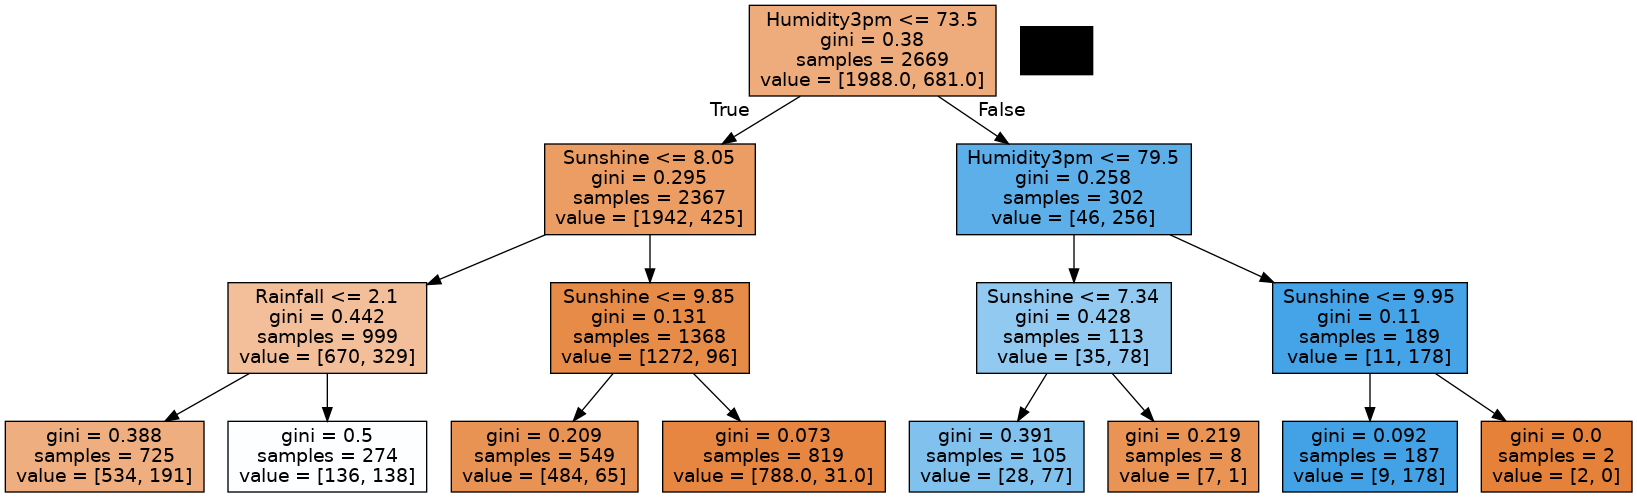

In [113]:
from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [115]:
rf_classifier = RandomForestClassifier(random_state=42)

In [116]:
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 4],
}

In [117]:
# Perform GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [118]:
# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_

In [119]:
# Predict values using the best model
y_train_pred_rf = best_rf_classifier.predict(x_train)
y_test_pred_rf = best_rf_classifier.predict(x_test)

In [120]:
# Model Performance
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)

In [121]:
# Print the results for Random Forest Classifier
print("Random Forest Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rf)
print("\nAccuracy Score (Training Data):", acs_train_rf)
print("\nPrecision Score (Training Data):", pcs_train_rf)
print("\nRecall Score (Training Data):", rcs_train_rf)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_rf)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_rf)
print("\nAccuracy Score (Testing Data):", acs_test_rf)
print("\nPrecision Score (Test Data):", pcs_test_rf)
print("\nRecall Score (Test Data):", rcs_test_rf)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_rf)
print("\n------------------------------------------------------")

Random Forest Classifier Results:
Confusion Matrix (Training Data):
[[1957   31]
 [ 179  502]]

Accuracy Score (Training Data): 0.9213188460097415

Precision Score (Training Data): 0.9418386491557224

Recall Score (Training Data): 0.737151248164464

ROC AUC Score (Training Data): 0.8607788433981274

------------------------------------------------------

Confusion Matrix (Testing Data):
[[451  33]
 [ 88  96]]

Accuracy Score (Testing Data): 0.8188622754491018

Precision Score (Test Data): 0.7441860465116279

Recall Score (Test Data): 0.5217391304347826

ROC AUC Score (Test Data): 0.7267786561264823

------------------------------------------------------


## Observation
Here we can observe that the accuracy score of training data is 92% and accuracy score of test data is 81%,Though the accuracy score of training data is good we cannot say it as a good model because accuracy score of training data is far more than the test data accuracy score.so,We can say it as overfitted

##  Ensemble Methods

## Bagging

In [122]:
from sklearn.ensemble import BaggingClassifier

In [123]:
# Define the base Decision Tree model
base_tree = tree.DecisionTreeClassifier(max_depth=3)

In [124]:
# Create a BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_tree, random_state=42)

In [125]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100]
}


In [126]:
# Perform GridSearchCV
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                         random_state=42),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [127]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_bagging_clf = grid_search.best_estimator_

In [128]:
# Predict values using the best model
y_train_pred_bagging = best_bagging_clf.predict(x_train)
y_test_pred_bagging = best_bagging_clf.predict(x_test)

In [129]:
# Model Performance
cfm_train_bagging = confusion_matrix(y_train, y_train_pred_bagging)
cfm_test_bagging = confusion_matrix(y_test, y_test_pred_bagging)
acs_train_bagging = accuracy_score(y_train, y_train_pred_bagging)
acs_test_bagging = accuracy_score(y_test, y_test_pred_bagging)
pcs_train_bagging = precision_score(y_train, y_train_pred_bagging)
pcs_test_bagging = precision_score(y_test, y_test_pred_bagging)
rcs_train_bagging = recall_score(y_train, y_train_pred_bagging)
rcs_test_bagging = recall_score(y_test, y_test_pred_bagging)
roc_auc_score_train_bagging = roc_auc_score(y_train, y_train_pred_bagging)
roc_auc_score_test_bagging = roc_auc_score(y_test, y_test_pred_bagging)

In [130]:
# Print the results for Bagging Classifier
print("Best Hyperparameter:", best_params)
print("Bagging Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_bagging)
print("\nAccuracy Score (Training Data):", acs_train_bagging)
print("\nPrecision Score (Training Data):", pcs_train_bagging)
print("\nRecall Score (Training Data):", rcs_train_bagging)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_bagging)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_bagging)
print("\nAccuracy Score (Testing Data):", acs_test_bagging)
print("\nPrecision Score (Test Data):", pcs_test_bagging)
print("\nRecall Score (Test Data):", rcs_test_bagging)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_bagging)
print("\n------------------------------------------------------")

Best Hyperparameter: {'n_estimators': 10}
Bagging Classifier Results:
Confusion Matrix (Training Data):
[[1921   67]
 [ 357  324]]

Accuracy Score (Training Data): 0.8411390033720495

Precision Score (Training Data): 0.8286445012787724

Recall Score (Training Data): 0.47577092511013214

ROC AUC Score (Training Data): 0.721034355915227

------------------------------------------------------

Confusion Matrix (Testing Data):
[[462  22]
 [ 97  87]]

Accuracy Score (Testing Data): 0.8218562874251497

Precision Score (Test Data): 0.7981651376146789

Recall Score (Test Data): 0.47282608695652173

ROC AUC Score (Test Data): 0.7136857707509882

------------------------------------------------------


## Observation
Bagging classifier performs weel on both training and testing data set,so we can say as it is not overfitted and which is having good performance and accuracy score as 82%

In [131]:
import pickle

In [132]:
with open('best_bagging_clf_model.pkl', 'wb') as f:
    pickle.dump(best_bagging_clf, f)

In [133]:
# Print the results for Bagging Classifier
print("Best Hyperparameter:", best_params)
print("Bagging Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_bagging)
print("\nAccuracy Score (Training Data):", acs_train_bagging)
print("\nPrecision Score (Training Data):", pcs_train_bagging)
print("\nRecall Score (Training Data):", rcs_train_bagging)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_bagging)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_bagging)
print("\nAccuracy Score (Testing Data):", acs_test_bagging)
print("\nPrecision Score (Test Data):", pcs_test_bagging)
print("\nRecall Score (Test Data):", rcs_test_bagging)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_bagging)
print("\n------------------------------------------------------")

Best Hyperparameter: {'n_estimators': 10}
Bagging Classifier Results:
Confusion Matrix (Training Data):
[[1921   67]
 [ 357  324]]

Accuracy Score (Training Data): 0.8411390033720495

Precision Score (Training Data): 0.8286445012787724

Recall Score (Training Data): 0.47577092511013214

ROC AUC Score (Training Data): 0.721034355915227

------------------------------------------------------

Confusion Matrix (Testing Data):
[[462  22]
 [ 97  87]]

Accuracy Score (Testing Data): 0.8218562874251497

Precision Score (Test Data): 0.7981651376146789

Recall Score (Test Data): 0.47282608695652173

ROC AUC Score (Test Data): 0.7136857707509882

------------------------------------------------------


In [134]:
# Load the model from the pickle file
with open('best_bagging_clf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [135]:
# Use the loaded model to make predictions
y_train_pred_loaded = loaded_model.predict(x_train)
y_test_pred_loaded = loaded_model.predict(x_test)

In [136]:
# Model Performance
cfm_train_loaded = confusion_matrix(y_train, y_train_pred_loaded)
cfm_test_loaded = confusion_matrix(y_test, y_test_pred_loaded)
acs_train_loaded = accuracy_score(y_train, y_train_pred_loaded)
acs_test_loaded = accuracy_score(y_test, y_test_pred_loaded)
pcs_train_loaded = precision_score(y_train, y_train_pred_loaded)
pcs_test_loaded = precision_score(y_test, y_test_pred_loaded)
rcs_train_loaded = recall_score(y_train, y_train_pred_loaded)
rcs_test_loaded = recall_score(y_test, y_test_pred_loaded)
roc_auc_score_train_loaded = roc_auc_score(y_train, y_train_pred_loaded)
roc_auc_score_test_loaded = roc_auc_score(y_test, y_test_pred_loaded)

In [137]:
# Print the results for the loaded model
print("Results for Loaded Model:")
print("Confusion Matrix (Training Data):")
print(cfm_train_loaded)
print("\nAccuracy Score (Training Data):", acs_train_loaded)
print("\nPrecision Score (Training Data):", pcs_train_loaded)
print("\nRecall Score (Training Data):", rcs_train_loaded)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_loaded)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_loaded)
print("\nAccuracy Score (Testing Data):", acs_test_loaded)
print("\nPrecision Score (Test Data):", pcs_test_loaded)
print("\nRecall Score (Test Data):", rcs_test_loaded)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_loaded)
print("\n------------------------------------------------------")

Results for Loaded Model:
Confusion Matrix (Training Data):
[[1921   67]
 [ 357  324]]

Accuracy Score (Training Data): 0.8411390033720495

Precision Score (Training Data): 0.8286445012787724

Recall Score (Training Data): 0.47577092511013214

ROC AUC Score (Training Data): 0.721034355915227

------------------------------------------------------

Confusion Matrix (Testing Data):
[[462  22]
 [ 97  87]]

Accuracy Score (Testing Data): 0.8218562874251497

Precision Score (Test Data): 0.7981651376146789

Recall Score (Test Data): 0.47282608695652173

ROC AUC Score (Test Data): 0.7136857707509882

------------------------------------------------------
